# Earthquakes in 1910-2021 Turkey Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
df=pd.read_csv("turkey_earthquakes(1915-2021).csv",sep=';')

In [11]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2020.12.31,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           17370 non-null  int64  
 1   Deprem Kodu  17370 non-null  float64
 2   Olus zamani  17370 non-null  object 
 3   Enlem        17370 non-null  float64
 4   Boylam       17370 non-null  float64
 5   Derinlik     17370 non-null  float64
 6   xM           17370 non-null  float64
 7   MD           17370 non-null  float64
 8   ML           17370 non-null  float64
 9   Mw           4645 non-null   float64
 10  Ms           17370 non-null  float64
 11  Mb           17370 non-null  float64
 12  Tip          17370 non-null  object 
 13  Yer          17370 non-null  object 
 14  year         17370 non-null  int64  
 15  month        17370 non-null  int64  
 16  day          17370 non-null  int64  
dtypes: float64(10), int64(4), object(3)
memory usage: 2.3+ MB


In [ ]:
df.drop("No",axis=1,inplace=True)

In [13]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2020.12.31,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [15]:
df['Olus tarihi']=pd.to_datetime(df["Olus tarihi"])

In [16]:
df["year"]=(df['Olus tarihi']).dt.year
df["month"]=(df['Olus tarihi']).dt.month
df["day"]=(df['Olus tarihi']).dt.day
df.drop("Olus tarihi",axis=1,inplace=True)

In [17]:
df.head()

,No,Deprem Kodu,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,year,month,day
0,1,2.021010e+13,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ),2021,1,1
1,2,2.020120e+13,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI,2020,12,31
2,3,2.020120e+13,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ,2020,12,30
3,4,2.020120e+13,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ),2020,12,30
4,5,2.020120e+13,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km],2020,12,27


In [21]:
df["hour"]=df['Olus zamani'].str[0:2]
df["minute"]=df['Olus zamani'].str[3:5]
df["second"]=df['Olus zamani'].str[6:8]
df["time_period"]=df['Olus zamani'].str[9:11]

In [23]:
df.head()

,No,Deprem Kodu,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,...,Mb,Tip,Yer,year,month,day,hour,minute,second,time_period
0,1,2.021010e+13,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,...,0.0,Ke,RODOS ADASI (AKDENIZ),2021,1,1,16,36,21,41
1,2,2.020120e+13,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,...,0.0,Ke,EGE DENIZI,2020,12,31,00,51,27,94
2,3,2.020120e+13,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,...,0.0,Ke,AKDENIZ,2020,12,30,18,45,12,79
3,4,2.020120e+13,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,...,0.0,Ke,ONIKI ADALAR (AKDENIZ),2020,12,30,13,40,12,22
4,5,2.020120e+13,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,...,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km],2020,12,27,20,08,36,88


In [25]:
df.drop("Olus zamani",axis=1,inplace=True)

In [26]:
df.head()

,No,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,year,month,day,hour,minute,second,time_period
0,1,2.021010e+13,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ),2021,1,1,16,36,21,41
1,2,2.020120e+13,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI,2020,12,31,00,51,27,94
2,3,2.020120e+13,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ,2020,12,30,18,45,12,79
3,4,2.020120e+13,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ),2020,12,30,13,40,12,22
4,5,2.020120e+13,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km],2020,12,27,20,08,36,88


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           17370 non-null  int64  
 1   Deprem Kodu  17370 non-null  float64
 2   Enlem        17370 non-null  float64
 3   Boylam       17370 non-null  float64
 4   Derinlik     17370 non-null  float64
 5   xM           17370 non-null  float64
 6   MD           17370 non-null  float64
 7   ML           17370 non-null  float64
 8   Mw           4645 non-null   float64
 9   Ms           17370 non-null  float64
 10  Mb           17370 non-null  float64
 11  Tip          17370 non-null  object 
 12  Yer          17370 non-null  object 
 13  year         17370 non-null  int64  
 14  month        17370 non-null  int64  
 15  day          17370 non-null  int64  
 16  hour         17370 non-null  object 
 17  minute       17370 non-null  object 
 18  second       17370 non-null  object 
 19  time

In [28]:
df["hour"]=df["hour"].astype(int)
df["minute"]=df["minute"].astype(int)
df["second"]=df["second"].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           17370 non-null  int64  
 1   Deprem Kodu  17370 non-null  float64
 2   Enlem        17370 non-null  float64
 3   Boylam       17370 non-null  float64
 4   Derinlik     17370 non-null  float64
 5   xM           17370 non-null  float64
 6   MD           17370 non-null  float64
 7   ML           17370 non-null  float64
 8   Mw           4645 non-null   float64
 9   Ms           17370 non-null  float64
 10  Mb           17370 non-null  float64
 11  Tip          17370 non-null  object 
 12  Yer          17370 non-null  object 
 13  year         17370 non-null  int64  
 14  month        17370 non-null  int64  
 15  day          17370 non-null  int64  
 16  hour         17370 non-null  int32  
 17  minute       17370 non-null  int32  
 18  second       17370 non-null  int32  
 19  time

In [41]:
df.Yer.value_counts().head(50)

AKDENIZ                                                2876
EGE DENIZI                                              398
ONIKI ADALAR (AKDENIZ)                                  352
GOKOVA KORFEZI (AKDENIZ)                                173
G?KOVA K?RFEZI (AKDENIZ)                                172
SURIYE                                                  126
MIDILLI ADASI (EGE DENIZI)                              125
SISAM ADASI (EGE DENIZI)                                125
IRAK                                                    110
IZMIR K?RFEZI (EGE DENIZI)                              109
KUSADASI KORFEZI (EGE DENIZI)                           108
MARMARA DENIZI                                           87
GIRIT ADASI (AKDENIZ)                                    87
SAROS K?RFEZI (EGE DENIZI)                               82
RODOS ADASI (AKDENIZ)                                    81
ANTALYA K?RFEZI (AKDENIZ)                                79
VAN G?L?                                

<Axes: >

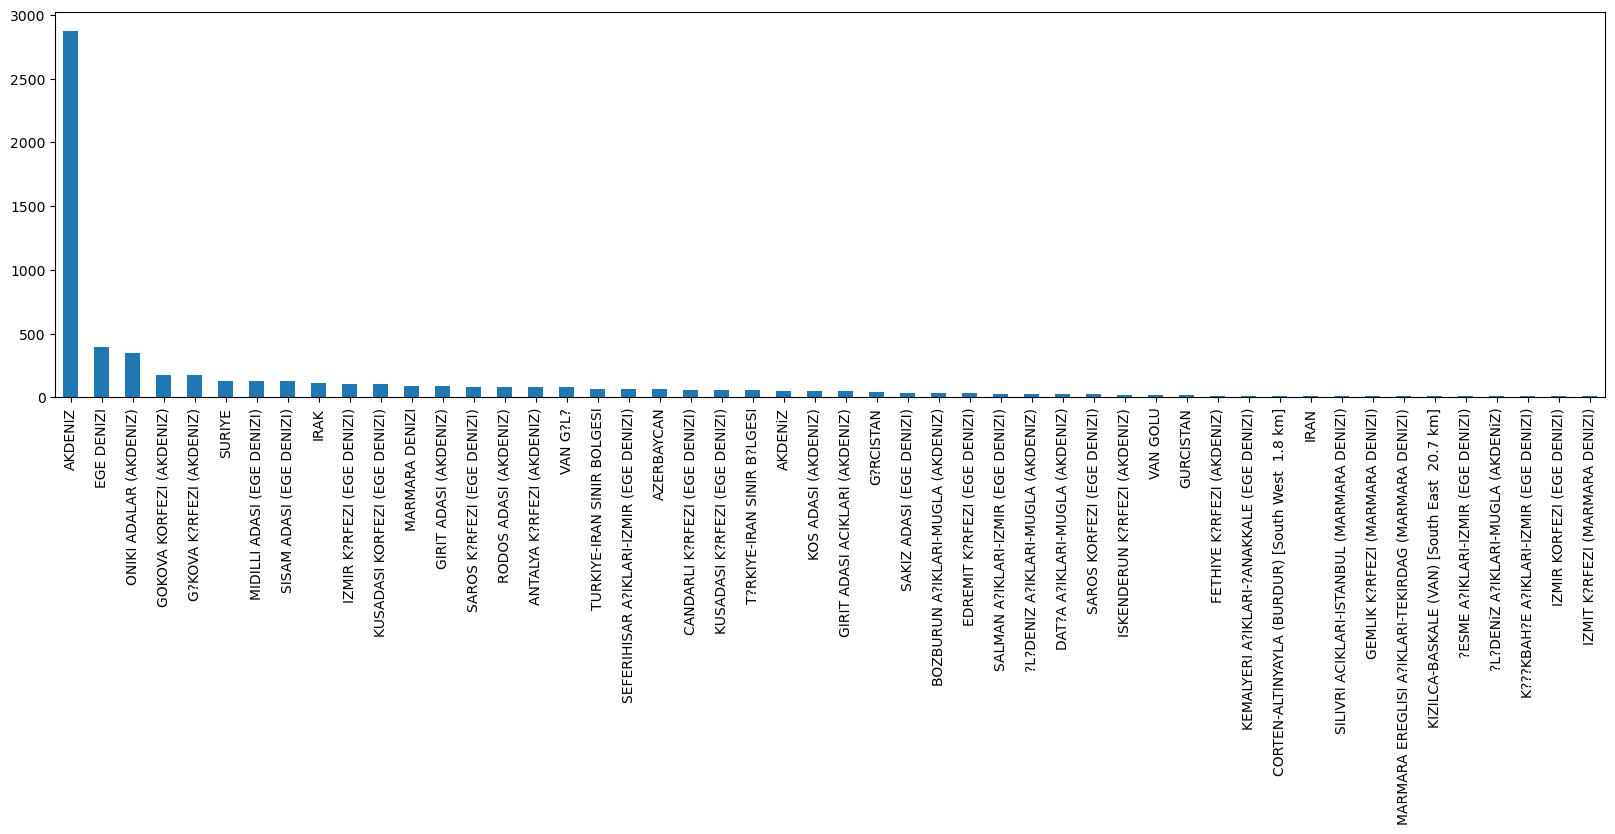

In [43]:
##Deprem Yerlere Göre Dağılım Grafiği
plt.figure(figsize=(20,5))
df.Yer.value_counts().head(50).plot.bar()

<Axes: >

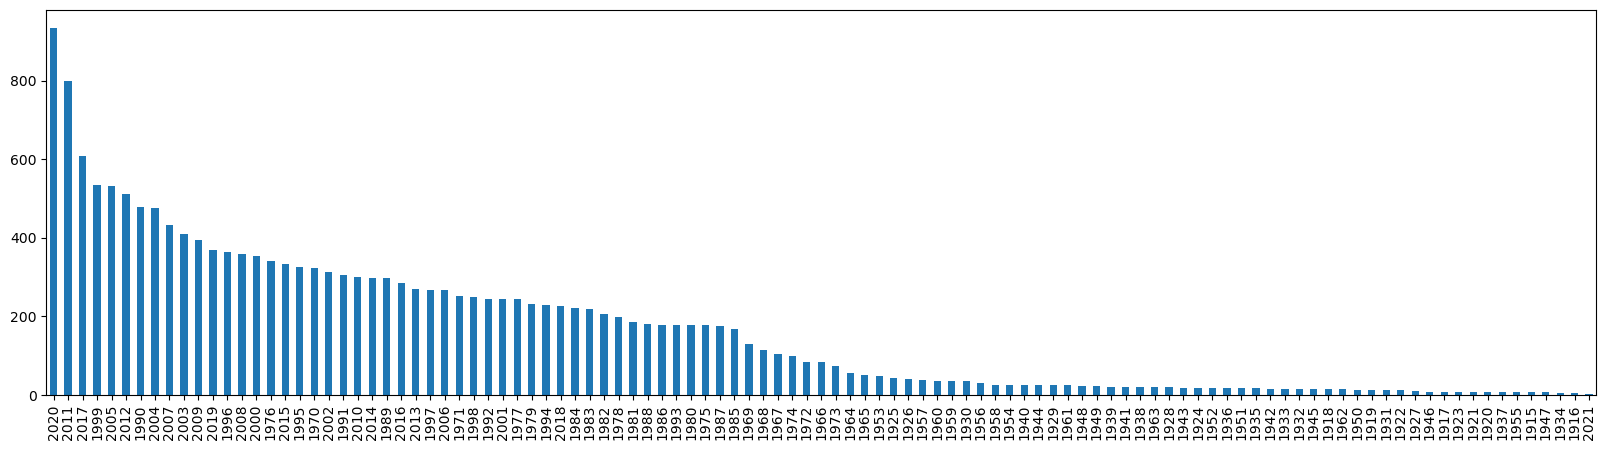

In [33]:
##Depremin Yıllara Göre Dağılımı
plt.figure(figsize=(20,5))
df.year.value_counts().plot.bar()

<Axes: >

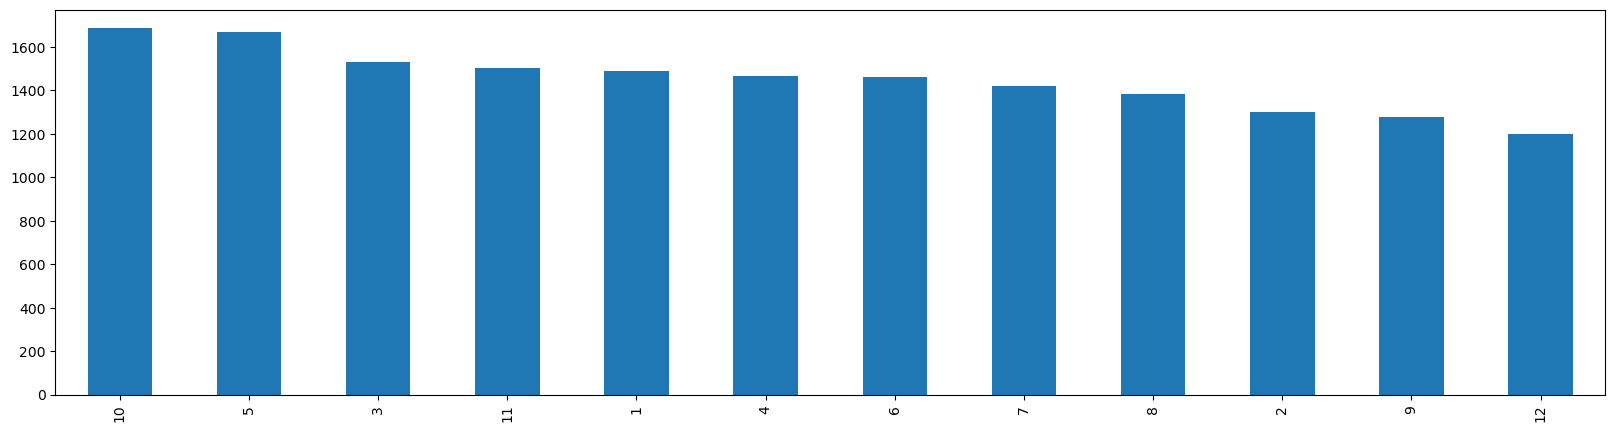

In [34]:
##Depremin Aylara Göre Dağılımı
plt.figure(figsize=(20,5))
df.month.value_counts().plot.bar()

<Axes: >

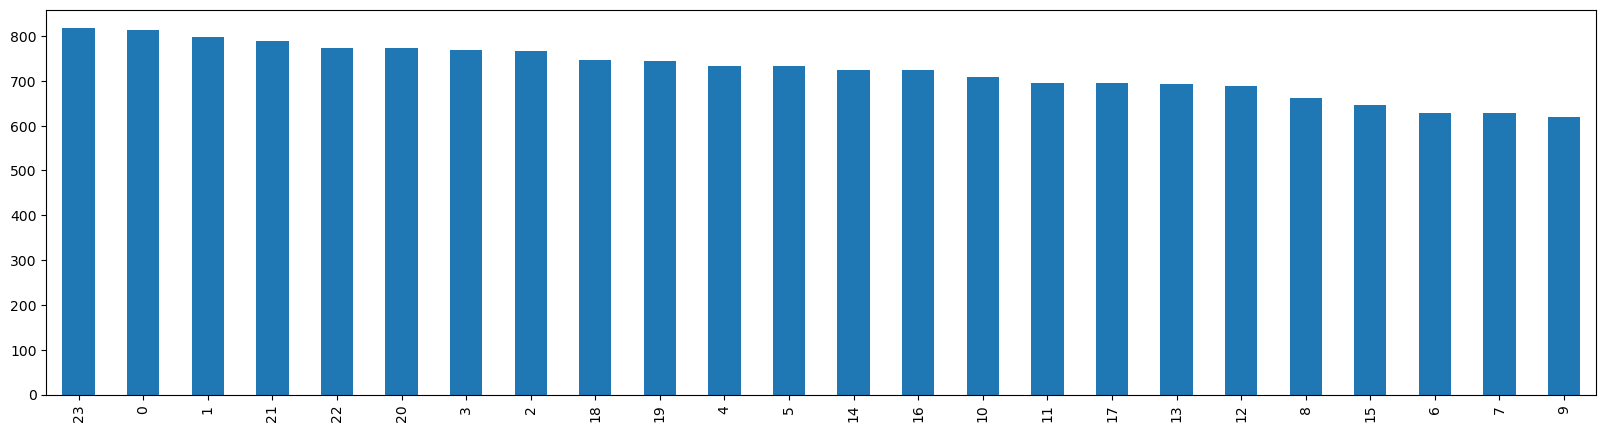

In [35]:
##Depremin Günlere Göre Dağılımı
plt.figure(figsize=(20,5))
df.hour.value_counts().plot.bar()

<Axes: >

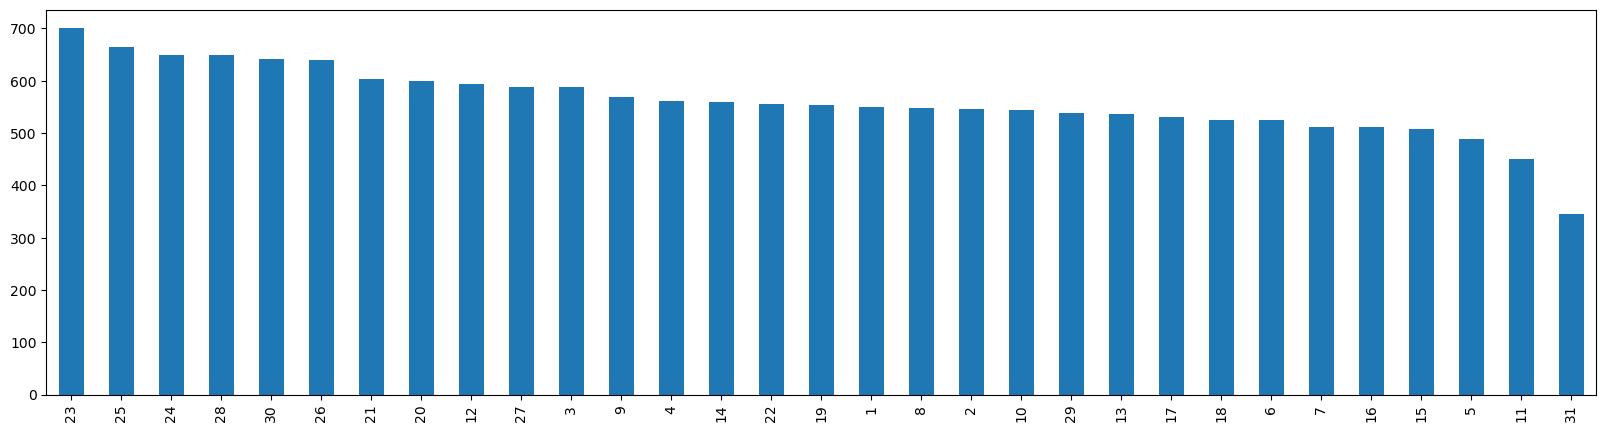

In [36]:
##Depremin Günlere Göre Dağılımı
plt.figure(figsize=(20,5))
df.day.value_counts().plot.bar()

<Axes: >

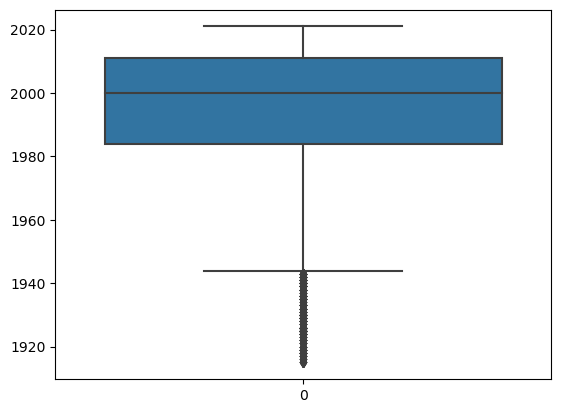

In [37]:
sns.boxplot(df.year)